In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("/Users/ebby/Downloads/train.csv")
test=pd.read_csv("/Users/ebby/Downloads/test.csv")

In [3]:
train.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train.info()
print("_"*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-

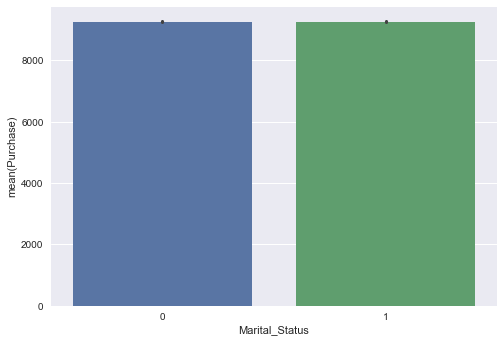

In [5]:
sns.barplot(x="Marital_Status",y="Purchase",data=train)
plt.show()

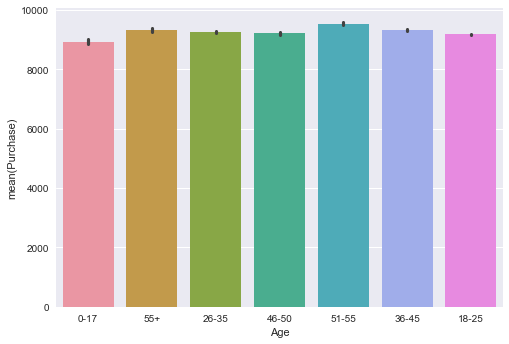

In [6]:
sns.barplot(x="Age",y="Purchase",data=train)
plt.show()

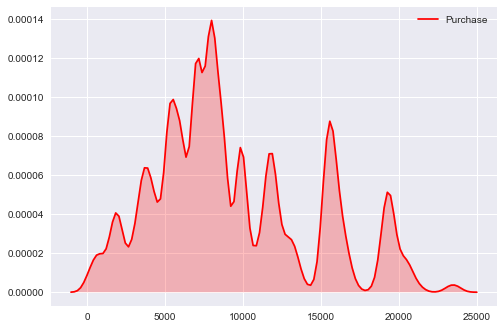

In [7]:
sns.kdeplot(train.Purchase,shade=True,color="red")
plt.show()

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


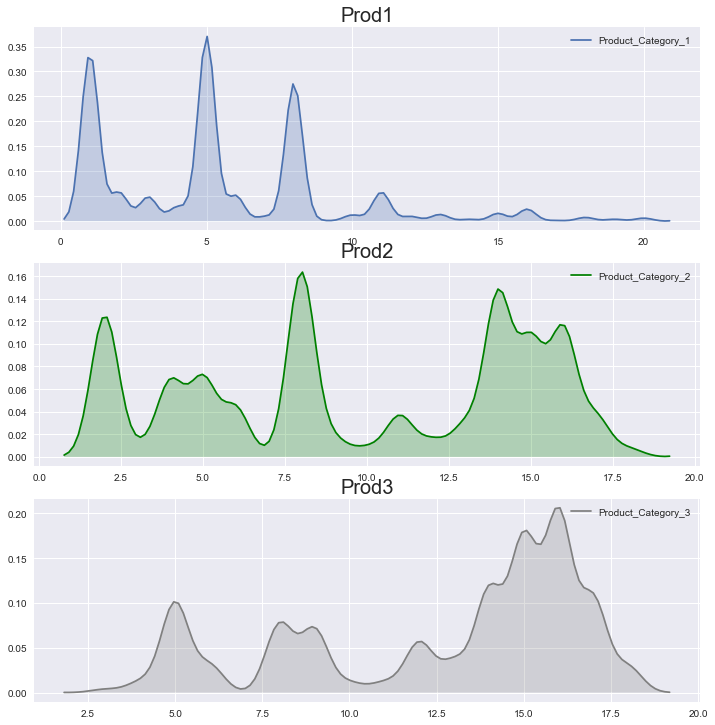

In [8]:
fig,axs=plt.subplots(15,5,figsize=(10,10))
ax1=plt.subplot2grid((15,5),(0,0),colspan=5,rowspan=5)
ax2=plt.subplot2grid((15,5),(5,0),colspan=5,rowspan=5)
ax3=plt.subplot2grid((15,5),(10,0),colspan=5,rowspan=5)
plt.tight_layout()
ax1.set_title("Prod1",fontsize=20)
ax2.set_title("Prod2",fontsize=20)
ax3.set_title("Prod3",fontsize=20)
sns.kdeplot(train.Product_Category_1,shade=True,ax=ax1)
sns.kdeplot(train.Product_Category_2,shade=True,ax=ax2,color="green")
sns.kdeplot(train.Product_Category_3,shade=True,ax=ax3,color="grey")
plt.show()


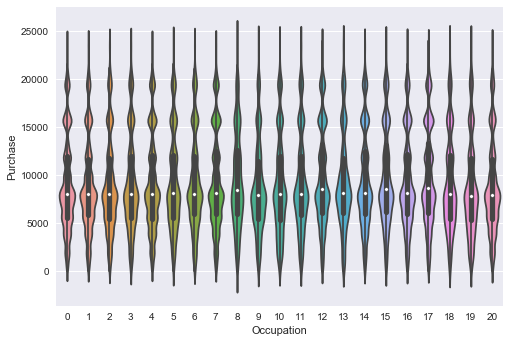

In [9]:
sns.violinplot(x="Occupation",y="Purchase",data=train)
plt.show()

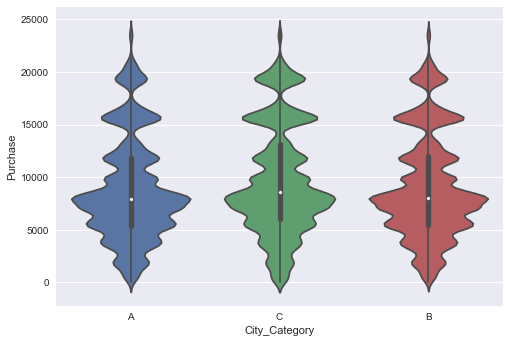

In [10]:
sns.violinplot(x="City_Category",y="Purchase",data=train)
plt.show()

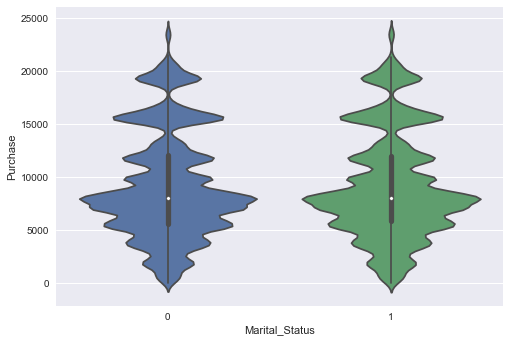

In [11]:
sns.violinplot(x="Marital_Status",y="Purchase",data=train)
plt.show()

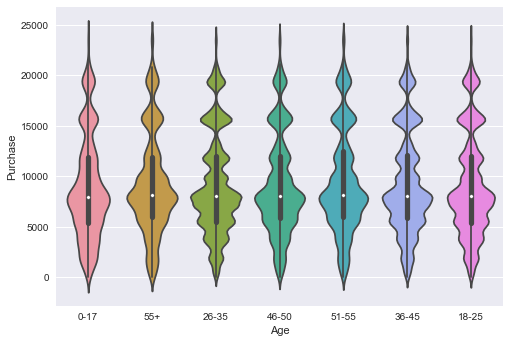

In [12]:
sns.violinplot(x="Age",y="Purchase",data=train)
plt.show()

In [13]:
train["new_status"]=train["Occupation"]
test["new_status"]=test["Occupation"]
train.head()
combine=[train,test]
for data in combine:
    data.loc[(data["Marital_Status"]==0),"new_status"]=data["new_status"]
    data.loc[(data["Marital_Status"]==1) ,"new_status"]=data["new_status"]+21


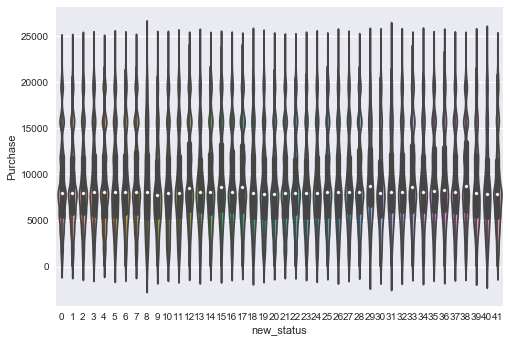

In [14]:
sns.violinplot(x="new_status",y="Purchase",data=train,size=20)
plt.show()

In [15]:
train["Product_Category_2"]=train["Product_Category_2"].fillna(train["Product_Category_2"].mean())
test["Product_Category_2"]=test["Product_Category_2"].fillna(test["Product_Category_2"].mean())
train["Product_Category_3"]=train["Product_Category_3"].fillna(train["Product_Category_3"].mean())
test["Product_Category_3"]=test["Product_Category_3"].fillna(test["Product_Category_3"].mean())
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,new_status
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,12.669454,28
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,12.669454,17
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,12.669454,22
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,12.669454,22
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.000000,1


In [16]:

train["Product_Category_2"]=train["Product_Category_2"].astype(int)
test["Product_Category_2"]=test["Product_Category_2"].astype(int)

train["Product_Category_3"]=train["Product_Category_3"].astype(int)
test["Product_Category_3"]=test["Product_Category_3"].astype(int)

In [17]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,new_status
0,1000001,P00069042,F,0-17,10,A,2,0,3,9,12,8370,10
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200,10
2,1000001,P00087842,F,0-17,10,A,2,0,12,9,12,1422,10
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,12,1057,10
4,1000002,P00285442,M,55+,16,C,4+,0,8,9,12,7969,16


In [18]:
train=train.drop(["Product_ID"],axis=1)
test=test.drop(["Product_ID"],axis=1)
train.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,new_status
0,1000001,F,0-17,10,A,2,0,3,9,12,8370,10
1,1000001,F,0-17,10,A,2,0,1,6,14,15200,10
2,1000001,F,0-17,10,A,2,0,12,9,12,1422,10
3,1000001,F,0-17,10,A,2,0,12,14,12,1057,10
4,1000002,M,55+,16,C,4+,0,8,9,12,7969,16


In [19]:
dictionary= {"F":1,"M":2}
combine=[train,test]
for i in combine:
    i["Gender"]=i["Gender"].map(dictionary)
train.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,new_status
0,1000001,1,0-17,10,A,2,0,3,9,12,8370,10
1,1000001,1,0-17,10,A,2,0,1,6,14,15200,10
2,1000001,1,0-17,10,A,2,0,12,9,12,1422,10
3,1000001,1,0-17,10,A,2,0,12,14,12,1057,10
4,1000002,2,55+,16,C,4+,0,8,9,12,7969,16


In [20]:
train["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'], dtype=object)

In [21]:
dictionary={'0-17':1, '55+':2, '26-35':3, '46-50':4, '51-55':5, '36-45':6, '18-25':7}
for i in combine:
    i["Age"]=i["Age"].map(dictionary)
train.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,new_status
0,1000001,1,1,10,A,2,0,3,9,12,8370,10
1,1000001,1,1,10,A,2,0,1,6,14,15200,10
2,1000001,1,1,10,A,2,0,12,9,12,1422,10
3,1000001,1,1,10,A,2,0,12,14,12,1057,10
4,1000002,2,2,16,C,4+,0,8,9,12,7969,16


In [22]:
dictionary={"A":1,"B":2,"C":3}
for i in combine:
    i["City_Category"]=i["City_Category"].map(dictionary)
train.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,new_status
0,1000001,1,1,10,1,2,0,3,9,12,8370,10
1,1000001,1,1,10,1,2,0,1,6,14,15200,10
2,1000001,1,1,10,1,2,0,12,9,12,1422,10
3,1000001,1,1,10,1,2,0,12,14,12,1057,10
4,1000002,2,2,16,3,4+,0,8,9,12,7969,16


In [23]:
train["Stay_In_Current_City_Years"]=train["Stay_In_Current_City_Years"].astype(str)
test["Stay_In_Current_City_Years"]=test["Stay_In_Current_City_Years"].astype(str)
combine=[train,test]
for dataset in combine:
    dataset['Stay_In_Current_City_Years']=dataset.Stay_In_Current_City_Years.str.extract('([0-9])')
    
#train["Stay_In_Current_City_Years"]=train["Stay_In_Current_City_Years"].astype(int)
#test["Stay_In_Current_City_Years"]=test["Stay_In_Current_City_Years"].astype(int)
train.head()


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """


,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,new_status
0,1000001,1,1,10,1,2,0,3,9,12,8370,10
1,1000001,1,1,10,1,2,0,1,6,14,15200,10
2,1000001,1,1,10,1,2,0,12,9,12,1422,10
3,1000001,1,1,10,1,2,0,12,14,12,1057,10
4,1000002,2,2,16,3,4,0,8,9,12,7969,16


In [24]:
from sklearn.linear_model import LinearRegression
train.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,new_status
0,1000001,1,1,10,1,2,0,3,9,12,8370,10
1,1000001,1,1,10,1,2,0,1,6,14,15200,10
2,1000001,1,1,10,1,2,0,12,9,12,1422,10
3,1000001,1,1,10,1,2,0,12,14,12,1057,10
4,1000002,2,2,16,3,4,0,8,9,12,7969,16


In [25]:
X_train = train.drop("Purchase", axis=1)
Y_train = train["Purchase"]
X_test  = test#.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((550068, 11), (550068,), (233599, 11))

In [26]:
logreg = LinearRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

0.12816808971655458